In [10]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw, AllChem
from rdkit.Chem import rdFingerprintGenerator
from rdkit.Chem.Draw import IPythonConsole
import numpy as np
from scipy.spatial import distance


In [12]:
mol = Chem.MolFromSmiles('CN1C(=O)CN=C(C2=C1C=CC(=C2)Cl)C3=CC=CC=C3') #diazepam

gen_mo = rdFingerprintGenerator.GetMorganGenerator(fpSize=256, radius=2)
a = gen_mo.GetFingerprint(mol)
b = AllChem.GetMorganFingerprintAsBitVect(mol,2,256,useFeatures=False) 
a_f = [int(i) for i in a.ToBitString()]
b_f = [int(i) for i in b.ToBitString()]
print('NumBits a: %s, NumBits b: %s' % (np.sum(a_f), np.sum(b_f)))
print('Dice Distance %s' % distance.dice(a_f,b_f))


NumBits a: 47, NumBits b: 38
Dice Distance 0.9058823529411765


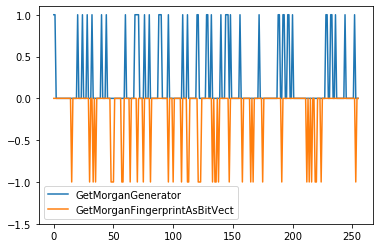

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(a_f, label='GetMorganGenerator')
plt.plot(-np.array(b_f), label='GetMorganFingerprintAsBitVect')
plt.ylim(-1.5, 1.1)
plt.legend()